In [183]:
#imports here
import pandas as pd
import numpy as np
import seaborn as sns

#Suppress warnings. 
import warnings

import matplotlib.pyplot as plt

#EDA tools
from datetime import datetime
from dateutil.parser import parser
import string
import re

#SKlearn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

#ignores warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [65]:
#load data here
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
weather = pd.read_csv('./working/weather.csv') #not sure if this is the total dataset.
spray = pd.read_csv('./input/spray.csv')

In [66]:
#check out the data
print(train.dtypes)
weather.drop(columns='Unnamed: 0',inplace=True)
base = train
train.head()

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [67]:
#uses list comp to change the type from string to a datetime 
train['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in train['Date']]
test['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in test['Date']]

In [68]:
#converts the weather data's dates
weather['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in weather['Date']]

In [69]:
#strips Culex geneus and leaves only the species.
train['Species'] = train['Species'].str.strip('CULEX ')
test['Species'] = test['Species'].str.strip('CULEX ')

In [70]:
#train['Species'].value_counts()/len(train['Species'])
#train['Trap'].value_counts()

In [71]:
#merges the weather data set to the train data set and gives it a temp variable
df1 = train.merge(weather,how='left')

In [72]:
#drops columsn that are unecessary
df = df1 #drop(labels=['Depart','Heat','Cool','CodeSum','Depth','Water1','SnowFall','Sunrise','Sunset'],axis=1)
df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,RH
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,65,0,9,0.00,29.39,30.11,5.8,18,6.5,57.3


In [73]:
#created a function to remove M(missing) & T(Trace) information and replace with 0

def remove_M(data):
    try:
        for i in range(len(data.columns)):
            data[str(data.columns[i])].replace(to_replace=['M'],value = 0, inplace=True)
            print(data.columns[i])
    except:
        #print(data.columns[i])
        pass

def remove_T(data):
    try:
        for i in range(len(data.columns)):
            data[str(data.columns[i])].replace(to_replace=['  T'],value =0, inplace=True)
    except:
        pass

In [74]:
#uses the function to replace the "M" and "T" amounts
remove_M(df)
remove_T(df)
remove_M(test)
remove_T(test)

Date
Address
Species
Block
Street
Trap
AddressNumberAndStreet
Latitude
Longitude
AddressAccuracy
NumMosquitos
WnvPresent
Tmax
Tmin
Tavg
Depart
DewPoint
WetBulb
Heat
Cool
PrecipTotal
StnPressure
SeaLevel
ResultSpeed
ResultDir
AvgSpeed
RH
Id
Date
Address
Species
Block
Street
Trap
AddressNumberAndStreet
Latitude
Longitude
AddressAccuracy


**Logistic Regression**

In [203]:
X = df[['Species','Latitude', 'Longitude','NumMosquitos','Tavg',
       'SeaLevel', 'ResultSpeed', 'AvgSpeed', 'RH']]
y = df['WnvPresent']

In [204]:
X['Species']= X['Species'].map(lambda x: 1 if x in ['PIPIENS/RESTUANS','RESTUANS','PIPIENS'] else 0)

In [205]:
test['Species']= test['Species'].map(lambda x: 1 if x in ['PIPIENS/RESTUANS','RESTUANS','PIPIENS'] else 0)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=33,stratify=y) 

In [207]:
ss = StandardScaler()
X_sc = ss.fit_transform(X_train)
X_sc_test = ss.transform(X_test)

In [208]:
lr = LogisticRegression()
lr.fit(X_sc,y_train)
lr.predict(X_sc_test)
print('Baseline: %0.4f'%lr.score(X_sc_test,y_test))

Baseline: 0.9477


In [209]:
#this is the percentage of west nile present in the area.
print(1-sum(y_train)/len(y_train))

0.9475115583355996


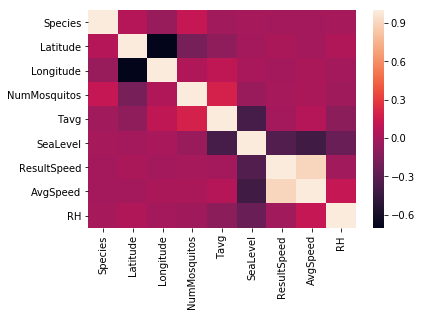

In [210]:
sns.heatmap(X.corr())

**Kernel Denisty Estimation(KDE)**